In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [5]:
titanic_df = pd.read_csv('/Users/Roman/Desktop/ML Сергей Русских/titanicdf.csv')

In [37]:
titanic_df.isna().sum()

Survived    0
Pclass      0
Age         0
Fare        0
youth_10    0
dtype: int64

In [6]:
titanic_df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [7]:
titanic_df = titanic_df[['Survived','Pclass','Age','Fare']]

In [11]:
titanic_df.dropna(inplace=True)

In [12]:
def check_age_for_ten_years(df):
    return df.Age // 10 * 10

In [13]:
titanic_df['youth_10'] = titanic_df.apply(check_age_for_ten_years,axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop('Survived',axis=1), titanic_df['Survived'], test_size=0.33, random_state=42)

In [15]:
X_train.head()

,Pclass,Age,Fare,youth_10
271,3,25.0,0.0000,20.0
853,1,16.0,39.4000,10.0
696,3,44.0,8.0500,40.0
518,2,36.0,26.0000,30.0
609,1,40.0,153.4625,40.0


In [18]:
clf = RandomForestClassifier()

In [19]:
model = clf.fit(X_train, y_train)
pred = model.predict(X_test)

#Оценить метрики бинарной классификации (Precision, recall, F1)

In [20]:
print('Accuracy:',accuracy_score(y_test,pred))
print('Precision:',precision_score(y_test,pred))
print('Recall:',recall_score(y_test,pred))
print('F1:',f1_score(y_test,pred))

Accuracy: 0.673728813559322
Precision: 0.6309523809523809
Recall: 0.5353535353535354
F1: 0.5792349726775956


In [21]:
model.predict(X_test)

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [22]:
model.predict_proba(X_test)[:,1]

array([0.96      , 0.99      , 0.8775    , 0.92      , 0.        ,
       0.77      , 0.2275    , 0.18      , 0.14      , 0.02      ,
       0.72      , 0.82016667, 0.86      , 0.09166667, 0.79      ,
       0.01      , 0.39      , 0.74      , 0.505     , 0.17      ,
       0.04      , 0.19      , 0.88      , 0.79      , 0.08      ,
       0.15      , 0.47      , 0.11      , 0.77      , 0.10583333,
       0.02      , 0.21      , 0.965     , 0.        , 0.20233333,
       0.18      , 0.46066667, 0.07      , 0.        , 0.        ,
       0.38      , 0.1       , 0.99      , 0.06      , 0.92      ,
       0.1       , 0.22      , 0.15      , 0.23      , 0.51      ,
       0.94      , 0.42345238, 0.85      , 0.06      , 0.18      ,
       0.3       , 0.74      , 0.25      , 0.6       , 0.09      ,
       0.12      , 0.39      , 0.09      , 0.15      , 0.32      ,
       0.57      , 1.        , 0.88      , 0.2245    , 0.14      ,
       0.15      , 0.76      , 0.11      , 0.19      , 0.04   

In [23]:
pred_proba = model.predict_proba(X_test)[:,1]

In [24]:
fpr, tpr, treshold = roc_curve(y_test, pred_proba)
tree_auc = roc_auc_score(y_test, pred_proba)
print('RandomForestClassifierr: ROC AUC=%.3f' % (tree_auc))

RandomForestClassifierr: ROC AUC=0.716


#Построить ROC-кривую для оценки качества классификатора

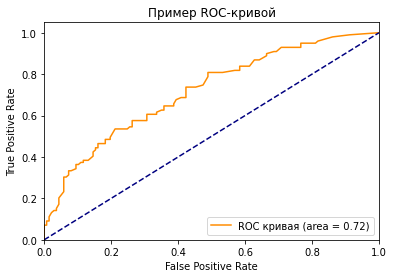

In [25]:
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr,  color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

#Подобрать лучшие гиперпараметры (n_estimators, criterion, max_depth)

In [30]:
test_deep = []
for deep in range (1,31):
    for leaf in range (1,5):
        clf = RandomForestClassifier(n_estimators=1, max_depth=deep, criterion='entropy')
        model = clf.fit(X_train, y_train)
        pred = model.predict(X_test)
        test_deep.append([deep,leaf,f1_score(y_test,pred),recall_score(y_test,pred)])

In [31]:
test_deep = pd.DataFrame(test_deep)
test_deep.columns = ['forest_depth','leaf','f1_score','recall_score']

In [32]:
test_deep.sort_values(by='f1_score',ascending=False).head(10)

,forest_depth,leaf,f1_score,recall_score
7,2,4,0.681818,0.757576
12,4,1,0.644444,0.585859
10,3,3,0.638743,0.616162
17,5,2,0.632768,0.565657
53,14,2,0.617021,0.585859
66,17,3,0.615385,0.606061
19,5,4,0.615385,0.525253
37,10,2,0.612440,0.646465
26,7,3,0.602273,0.535354
16,5,1,0.602273,0.535354


#Провести кросс-валидацию модели

In [34]:
cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=0)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')

In [35]:
scores.mean()

0.5856074076818717

In [36]:
scores

array([0.61904762, 0.56896552, 0.55555556, 0.59649123, 0.57142857,
       0.62121212, 0.59259259, 0.64285714, 0.52542373, 0.5625    ])